# Iris flower classification with Machine Learning

Iris flower have been classified into three species according to their measurements: setosa, versicolor, and virginica. In this project we'll aim to predict the iris flower species and classify them by using machine learning. 

## Data
> The original data came from: https://www.kaggle.com/datasets/saurabh00007/iriscsv



## Preparing the tools 

In [90]:
# Import all the tools we need 

# Regular EDA and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# we want our plots to appear inside the notebook 
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')


# Machine learning 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# Save the model 
import joblib 

# Load the data 


In [66]:
df = pd.read_csv('Iris 2.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis 

In this section our purpose is to explore the dataset. We'll carefully examine the data, search for any missing information and visualize the data to get a better understanding of it. This approach will enable us to gain insights into the structure of the data and identify any notable patterns. 

In [67]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [69]:
# We are going to drop the "Id" column since it's not going to be usefull for the analysis
df.drop('Id', axis='columns', inplace= True)
print(f"Dataset shape after dropping 'Id' column: {df.shape}")

Dataset shape after dropping 'Id' column: (150, 5)


In [70]:
# Display the data types of each column 
print(df.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [71]:
# Statistical analysis 
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
# Check for missing values 
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [73]:
# Column names 
print(f"Feature names: {df.columns.values}")

Feature names: ['SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm' 'Species']


In [74]:
# Check for missing values 
missing_values = df.isnull().sum()
print(f"Missing values in each column: \n{missing_values}")

Missing values in each column: 
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Data Visualization

###  Sepal Dimensions by Species 

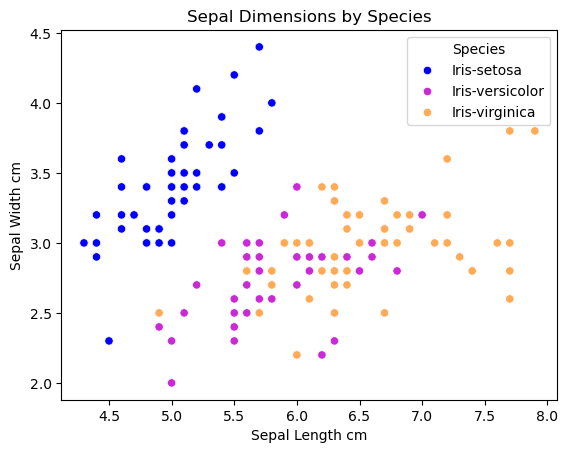

In [75]:
# Let's create a plot  
sns.scatterplot(x='SepalLengthCm', y= 'SepalWidthCm', hue= 'Species', data= df, palette='gnuplot2')
plt.title('Sepal Dimensions by Species')
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm');

* `Setosa` stands out as having the widest sepals among the three species. 
* `Virginica` tends to have longer sepals relative to the other species. 
* `Versicolor` falls between setosa and virginica in both sepal width and lenght measurements. 

### Petal Length cm by Species 

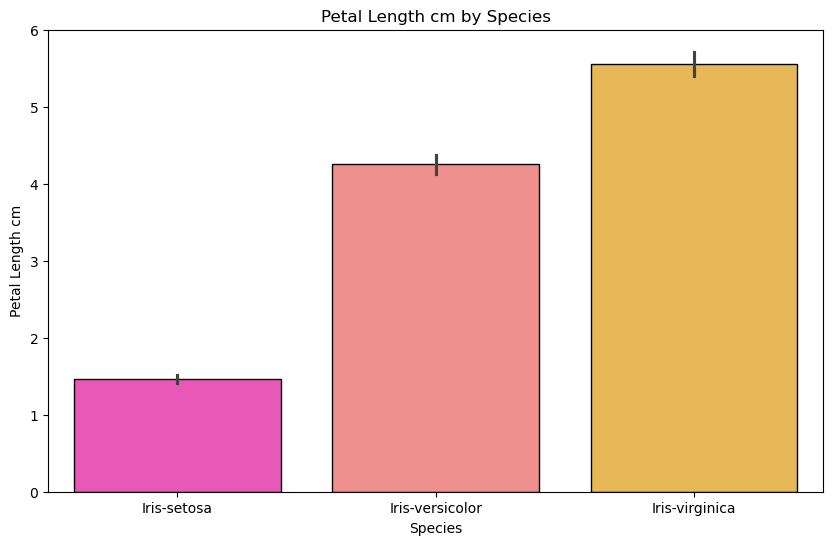

In [76]:
# Let's create a plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='PetalLengthCm', palette='spring', edgecolor='black', data=df)
plt.title('Petal Length cm by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length cm');

* `Virginica` species shows the largest petals among the three, with an average petal lenght noticeably greater than the setosa. 
* `Versicolor` shows intermediate petal sizes, generally larger than those of setosa but smaller than the virginica species. 
* `Setosa` is characterized by the smallest petal size of the three species, it's petals are visibly shorter compared to both versicolor and virginica.

### Petal Width cm by Species 

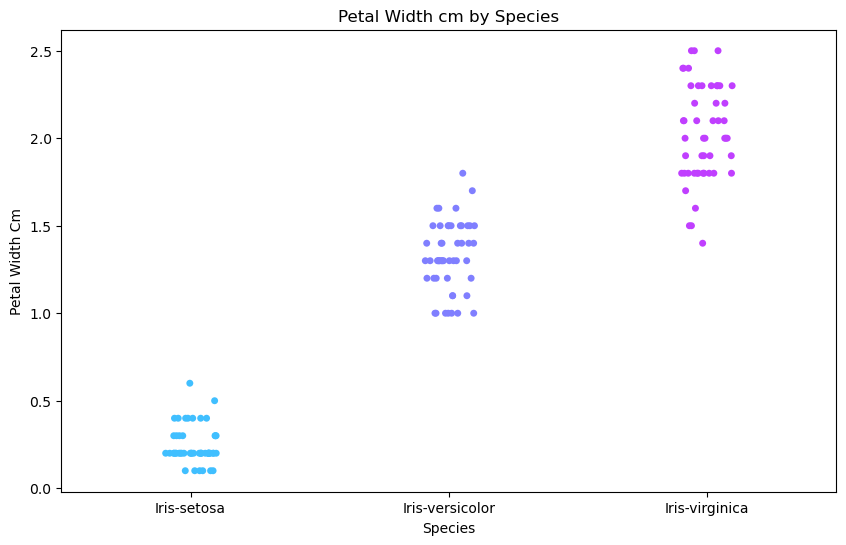

In [77]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Species', y='PetalWidthCm', palette='cool', data=df)
plt.title('Petal Width cm by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width Cm');

* `Virginica` exhibits the widest petal widths among the three species. 
* `Versicolor` displays intermediate petal widths, generally broader than those of setosa but narrower compared to virginica species. 
* `Setosa` characterized by the narrowest petal widths of the three species. 

### Distribution of Species 

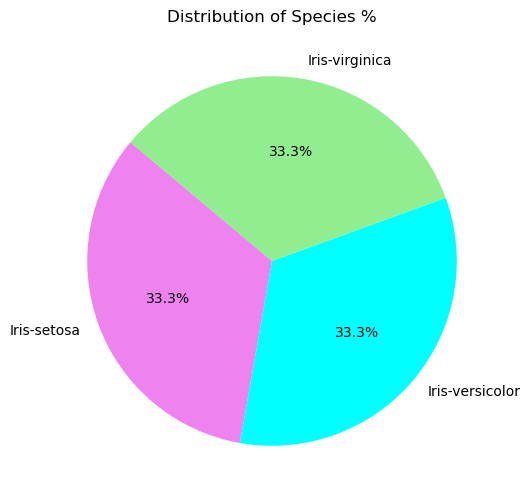

In [78]:
# Let's create a plot

species_counts = df['Species'].value_counts()
percentages = (species_counts / len(df)) * 100

plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, colors=['violet', 'aqua', 'lightgreen'])
plt.title('Distribution of Species %');

**Setosa, versicolor, and virginica** each account for one-third (33.3%) of the dataset, indicating a balanced distribution among the three species.
This visual representation highlights the uniform distribution of species within the dataset, with each species contributing equally to the overall composition.



# Feature Engineering

In this section, we are going to prepare our data for modeling. 

#### Encoding 

We are going to convert categorical variables into numerical variables using `LabelEncoder`.

In [79]:
le = LabelEncoder()
le.fit(df['Species'])
df['Species'] = le.fit_transform(df['Species'])

In [80]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Train - Test Split

In [81]:
# Split data into X and y 
X = df.drop('Species', axis=1)

y = df['Species']

In [82]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [84]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling 

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

Then we'll test it (use the patterns) on the test set.

We're going to use 2 different machine learning models: 
1. `SVC`
2. `RandomForestClassifier`

### SVC

In [85]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [86]:
print("Training Accuracy:", svc_model.score(X_train, y_train))
print("Testing Accuracy:", svc_model.score(X_test, y_test))

Training Accuracy: 0.9916666666666667
Testing Accuracy: 0.9333333333333333


In [92]:
svc_model = SVC(kernel='linear')
scores = cross_val_score(svc_model, X_train, y_train, cv=5)
print("Accuracy mean:", scores.mean())

Accuracy mean: 0.9833333333333334


### RandomForestClassifier

In [88]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
print("Training Accuracy:", rf_model.score(X_train, y_train))
print("Testing Accuracy:", rf_model.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.8666666666666667


In [96]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Accuracy mean:", scores.mean())

Accuracy mean: 0.9666666666666668


## Model Selection 

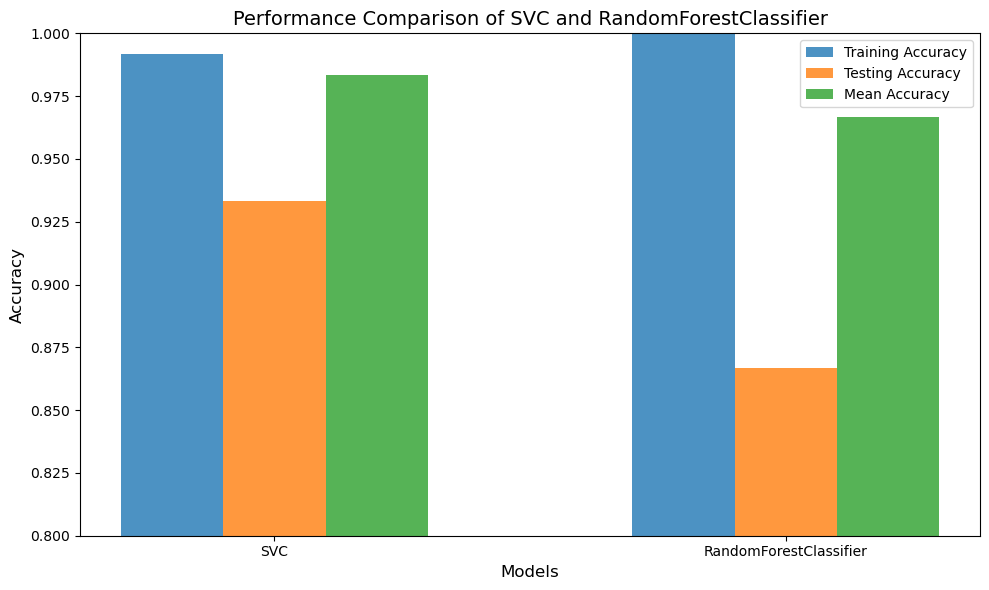

In [104]:
models = ['SVC', 'RandomForestClassifier']
training_accuracy = [0.9917, 1.0]
testing_accuracy = [0.9333, 0.8667]
mean_accuracy = [0.9833, 0.9667]

plt.figure(figsize=(10, 6))

bar_width = 0.2
index = range(len(models))

plt.bar(index, training_accuracy, width=bar_width, label='Training Accuracy', alpha=0.8)
plt.bar([i + bar_width for i in index], testing_accuracy, width=bar_width, label='Testing Accuracy', alpha=0.8)
plt.bar([i + 2 * bar_width for i in index], mean_accuracy, width=bar_width, label='Mean Accuracy', alpha=0.8)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Performance Comparison of SVC and RandomForestClassifier', fontsize=14)
plt.xticks([i + bar_width for i in index], models) 
plt.ylim(0.8, 1.0)
plt.legend()
plt.tight_layout();

> `SVC` appears to be the better model between the two for this data set:
> * Achieves a high testing accuracy while maintaining excellent training accuracy.
> * The mean accuracy suggest strong overral performance in terms of model fitting and generalization
>   
> `RandomForestClassifier` shows signs of potential overfitting with the training accuracy, but lower testing accuracy and mean accuracy. This means that this model may not generalize as well to unseen data as SVC. 